In [1]:
%pylab inline
from IPython.display import display, clear_output
import sys
import time
import pickle
import cgi
import urlparse
import utils
import collections
import csv

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib

pylab.rcParams['figure.figsize'] = 16, 12

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


### What is the distribution of categories in the apps tested?

In [2]:
package_category_lookup = {} # package_title : category

with open('../apk-categorizer/package_categories.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if "GAME" in row[1]:
            row[1] = "GAME"
        if "#" in row[1]:
            continue
        package_category_lookup[row[0]] = row[1]

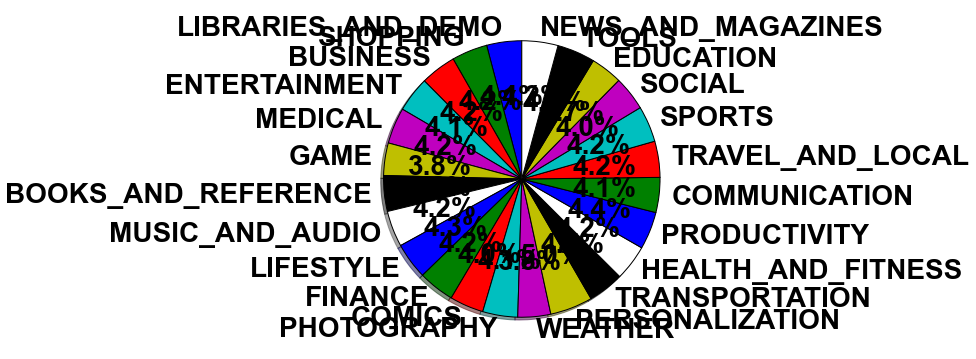

In [3]:

category_count = collections.defaultdict(int) # category : number of packages in that category

for package_title in package_category_lookup:
    category_count[package_category_lookup[package_title]] += 1

categories_labels = [x[0] for x in category_count.items()]
categories_counts = [x[1] for x in category_count.items()]

pylab.figure(1, figsize=(6,6))
ax = pylab.axes([0.1, 0.1, 0.8, 0.8])

labels = categories_labels
fracs = categories_counts

pylab.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

pylab.title('',bbox={'facecolor':'0.8', 'pad':5})

show()

### Of apps requesting location, how many are in each category?

In [4]:
location_category_count = collections.defaultdict(int) # category : number of apps in that category that requested location

for package_data in utils.packages.find():
    for request_data in package_data['requests_flagged']:
        if request_data['flag'] == "LOCATION":
            if package_data['package_title'] in package_category_lookup:
                location_category_count[package_category_lookup[package_data['package_title']]] += 1
            break

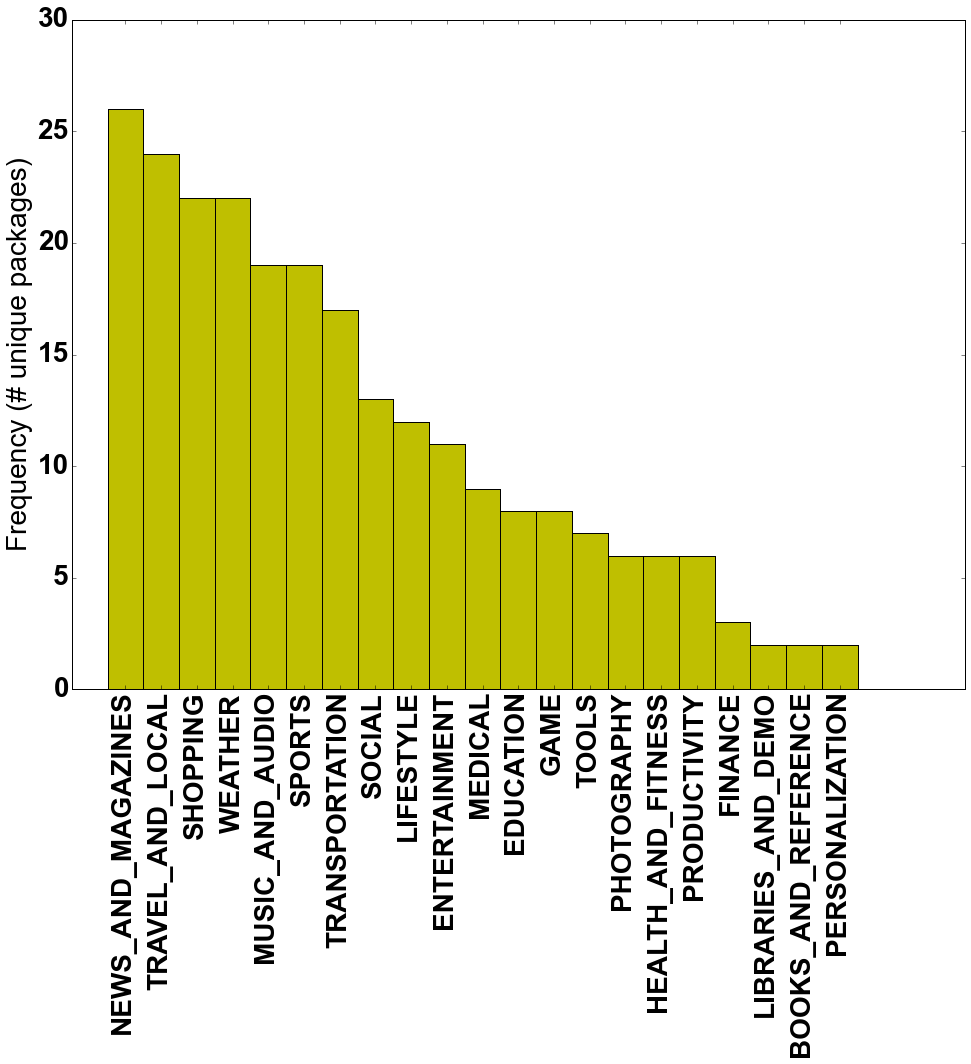

In [5]:
location_category_count_sorted = sorted(location_category_count.items(),key=lambda x: x[1], reverse=True)

N = len(location_category_count)
x = np.arange(1, N+1)
y = [num for (s, num) in location_category_count_sorted]
labels = [s for (s, num) in location_category_count_sorted]
width = 1
bar1 = plt.bar(x, y, width, color="y")
plt.ylabel('Frequency (# unique packages)')
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=90)
plt.show()

### Same analysis on age/gender?

In [6]:
agegender_category_count = collections.defaultdict(int) # category : number of apps in that category that requested location

for package_data in utils.packages.find():
    for request_data in package_data['requests_flagged']:
        if request_data['flag'] == "AGE" or request_data['flag'] == "GENDER":
            if package_data['package_title'] in package_category_lookup:
                agegender_category_count[package_category_lookup[package_data['package_title']]] += 1
            break

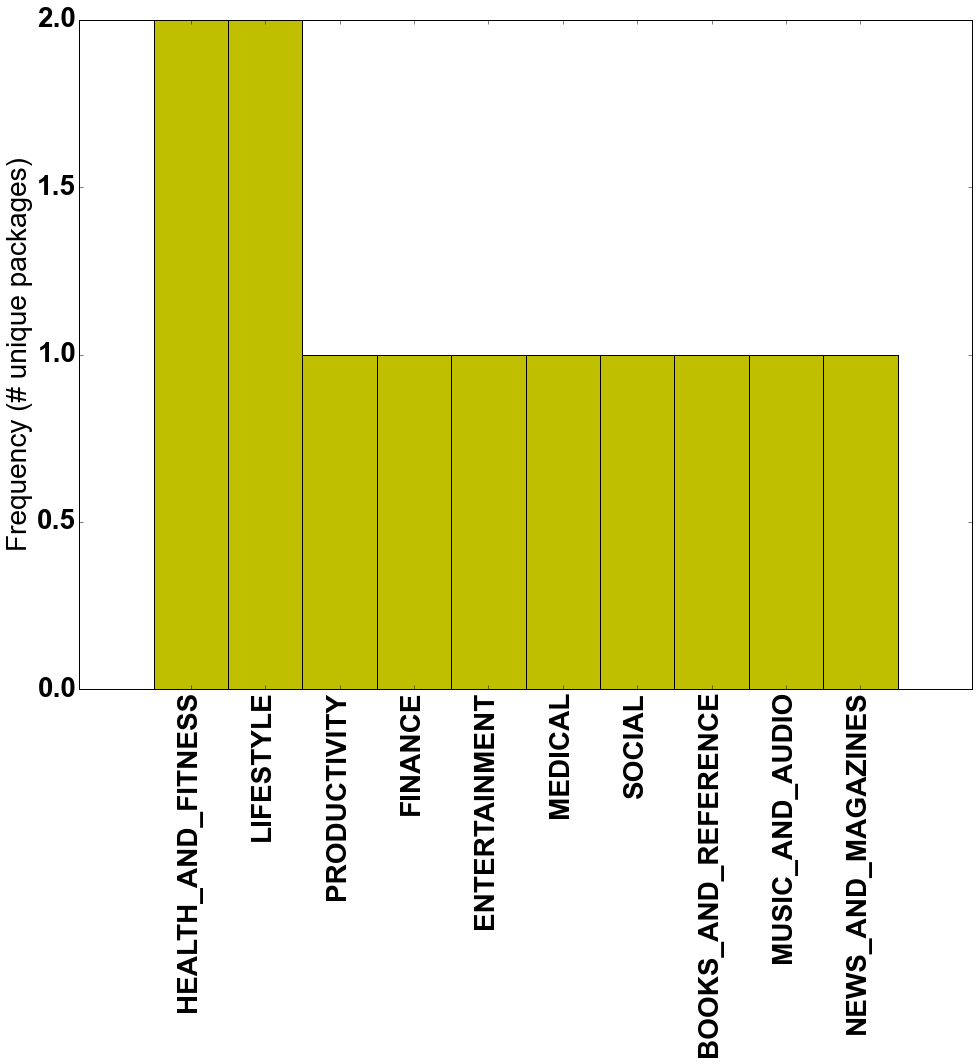

In [7]:
agegender_category_count_sorted = sorted(agegender_category_count.items(),key=lambda x: x[1], reverse=True)

N = len(agegender_category_count)
x = np.arange(1, N+1)
y = [num for (s, num) in agegender_category_count_sorted]
labels = [s for (s, num) in agegender_category_count_sorted]
width = 1
bar1 = plt.bar(x, y, width, color="y")
plt.ylabel('Frequency (# unique packages)')
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=90)
plt.show()